# Data Load

In [2]:
# Import Pandas for data loading, cleaning and transformation
import pandas as pd


Load dataset

In [3]:
# load the dataset
path = r"C:\Workspaces\Project\DA Elite\June\Data\HR_comma_sep.csv"
hr_df_v1 = pd.read_csv(path)

hr_df_v1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Check data shape and stats summary

In [4]:
hr_df_v1.shape
hr_df_v1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Check datatype


In [5]:
hr_df_v1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

Check for missing value

In [6]:
hr_df_v1.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Check categories under the department dataframe

In [7]:
hr_df_v1['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

# EDA

Cout Attrition Rate

In [8]:
hr_df_ED = hr_df_v1.copy()

In [9]:
left_vs_not_left = hr_df_ED['left'].value_counts()
left_vs_not_left_df = left_vs_not_left.rename_axis('left').reset_index(name='count')
left_vs_not_left_df['percentage'] = ((left_vs_not_left_df['count']/left_vs_not_left_df['count'].sum())*100).round(2)
left_vs_not_left_df



,left,count,percentage
0,0,11428,76.19
1,1,3571,23.81


Total Employee

In [10]:
total_employees = hr_df_ED.shape[0]
print("Total number of employees:", total_employees)


Total number of employees: 14999


Attrition Rate

In [11]:
left_count = hr_df_ED['left'].sum()
attrition_rate = (left_count / total_employees) * 100
print(f"Attrition Rate: {attrition_rate:.2f}%")


Attrition Rate: 23.81%


In [12]:
# Calculate attrition rate (number of employee who left divided by average number of employee)
left_empl_count = left_vs_not_left_df.loc[1,'count']
not_left_empl_count = left_vs_not_left_df.loc[0, 'count']
total_empl_count = left_vs_not_left_df['count'].sum()
avg_empl = (total_empl_count + not_left_empl_count)/2
attrition_rate = (left_empl_count/avg_empl)*100
attrition_rate

np.float64(27.02539069890642)

In [23]:
# calculate attrition by department
attrition_by_dept = hr_df_ED.groupby('Department')['left'].value_counts(normalize=True).unstack().fillna(0)
attrition_by_dept = attrition_by_dept.rename(columns={0: 'not_left', 1: 'left'})
attrition_by_dept['left_percentage'] = (attrition_by_dept['left'] * 100).round(2)
attrition_by_dept = attrition_by_dept.reset_index()
attrition_by_dept

left,Department,not_left,left,left_percentage
0,IT,0.777506,0.222494,22.25
1,RandD,0.846252,0.153748,15.37
2,accounting,0.734029,0.265971,26.60
3,hr,0.709066,0.290934,29.09
4,management,0.855556,0.144444,14.44
5,marketing,0.763403,0.236597,23.66
6,product_mng,0.780488,0.219512,21.95
7,sales,0.755072,0.244928,24.49
8,support,0.751009,0.248991,24.90
9,technical,0.743750,0.256250,25.62


 Department with Highest Attrition

Department Attrition Counts:
 Department
sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: count, dtype: int64


C:\Users\Amzat Ridwan\AppData\Local\Temp\ipykernel_25240\1971577078.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_attrition.index, y=dept_attrition.values, palette='viridis')


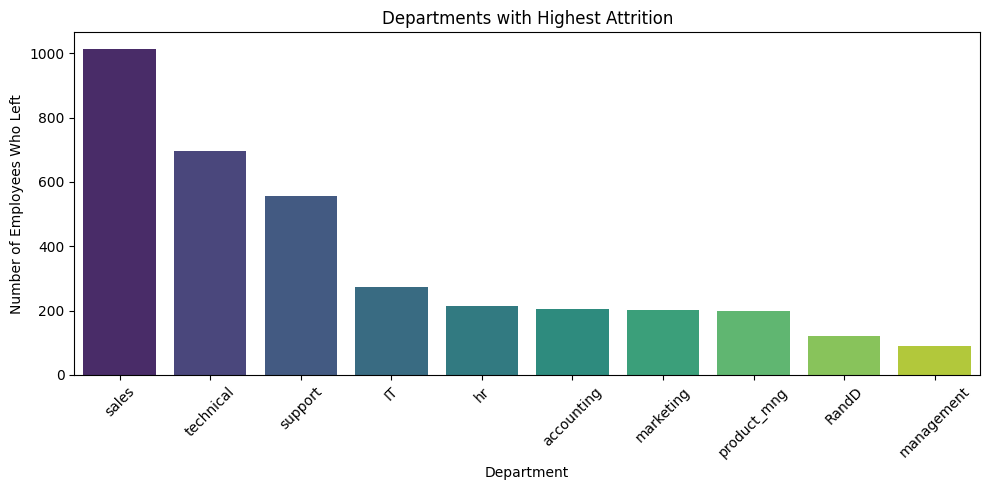

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt
dept_attrition = hr_df_ED[hr_df_ED['left'] == 1]['Department'].value_counts()
print("Department Attrition Counts:\n", dept_attrition)

# Visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=dept_attrition.index, y=dept_attrition.values, palette='viridis')
plt.title("Departments with Highest Attrition")
plt.ylabel("Number of Employees Who Left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
# Compare average feature values between employees who stayed vs left
comparison = hr_df_ED.groupby('left').mean(numeric_only=True).T
comparison.columns = ['Stayed', 'Left']
comparison['Difference'] = comparison['Left'] - comparison['Stayed']
comparison.sort_values(by='Difference', ascending=False)


,Stayed,Left,Difference
average_montly_hours,199.060203,207.419210,8.359007
time_spend_company,3.380032,3.876505,0.496474
number_project,3.786664,3.855503,0.068838
last_evaluation,0.715473,0.718113,0.002639
promotion_last_5years,0.026251,0.005321,-0.020931
Work_accident,0.175009,0.047326,-0.127683
satisfaction_level,0.666810,0.440098,-0.226712


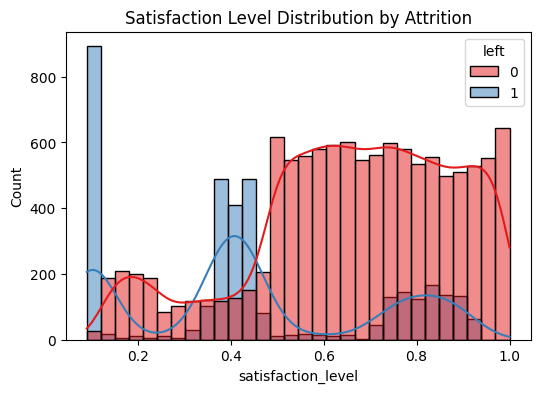

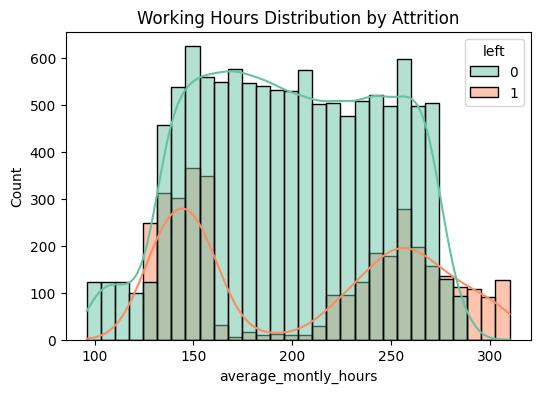

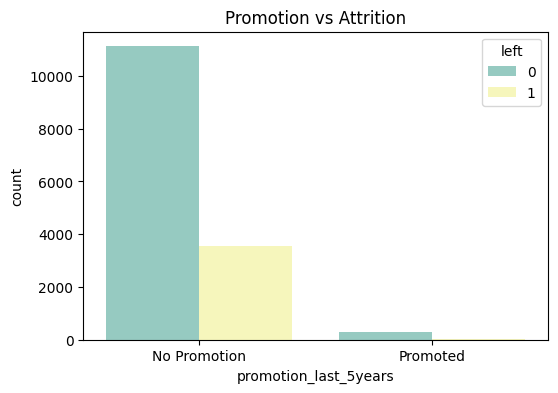

In [17]:
# Satisfaction level
plt.figure(figsize=(6, 4))
sns.histplot(data=hr_df_ED, x='satisfaction_level', hue='left', kde=True, palette='Set1')
plt.title("Satisfaction Level Distribution by Attrition")
plt.show()

# Average monthly hours
plt.figure(figsize=(6, 4))
sns.histplot(data=hr_df_ED, x='average_montly_hours', hue='left', kde=True, palette='Set2')
plt.title("Working Hours Distribution by Attrition")
plt.show()

# Promotion in last 5 years
plt.figure(figsize=(6, 4))
sns.countplot(x='promotion_last_5years', hue='left', data=hr_df_ED, palette='Set3')
plt.title("Promotion vs Attrition")
plt.xticks([0, 1], ['No Promotion', 'Promoted'])
plt.show()


Turnover Trends Across Departments and Salary Levels

C:\Users\Amzat Ridwan\AppData\Local\Temp\ipykernel_25240\3210835836.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_turnover.index, y=dept_turnover.values, palette='coolwarm')


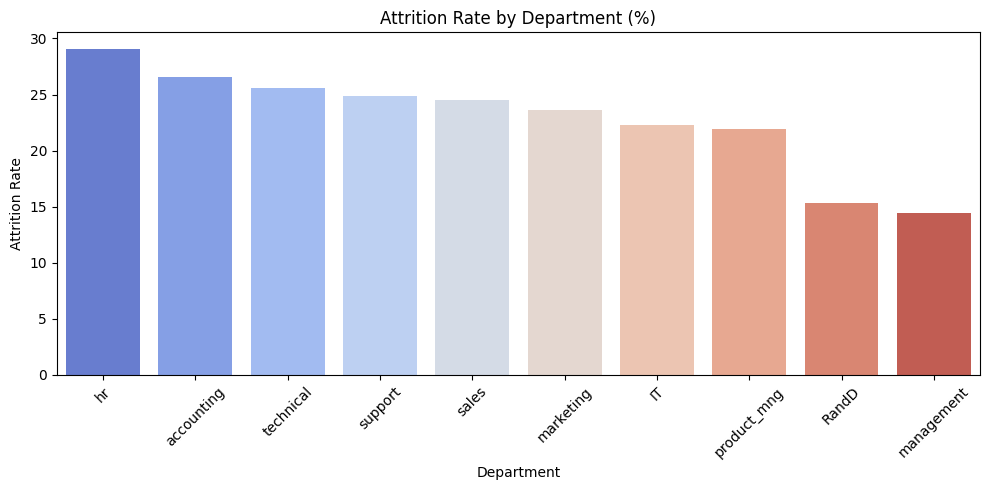

C:\Users\Amzat Ridwan\AppData\Local\Temp\ipykernel_25240\3210835836.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_turnover.index, y=salary_turnover.values, palette='magma')


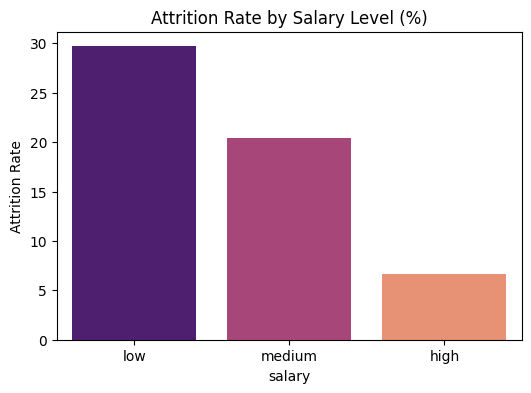

In [22]:
# Department vs Attrition %
dept_turnover = hr_df_ED.groupby('Department')['left'].mean().sort_values(ascending=False) * 100
plt.figure(figsize=(10, 5))
sns.barplot(x=dept_turnover.index, y=dept_turnover.values, palette='coolwarm')
plt.title("Attrition Rate by Department (%)")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Salary level vs attrition
salary_turnover = hr_df_ED.groupby('salary')['left'].mean().sort_values(ascending=False) * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=salary_turnover.index, y=salary_turnover.values, palette='magma')
plt.title("Attrition Rate by Salary Level (%)")
plt.ylabel("Attrition Rate")
plt.show()


 Correlation Heatmap (Attrition vs Features)

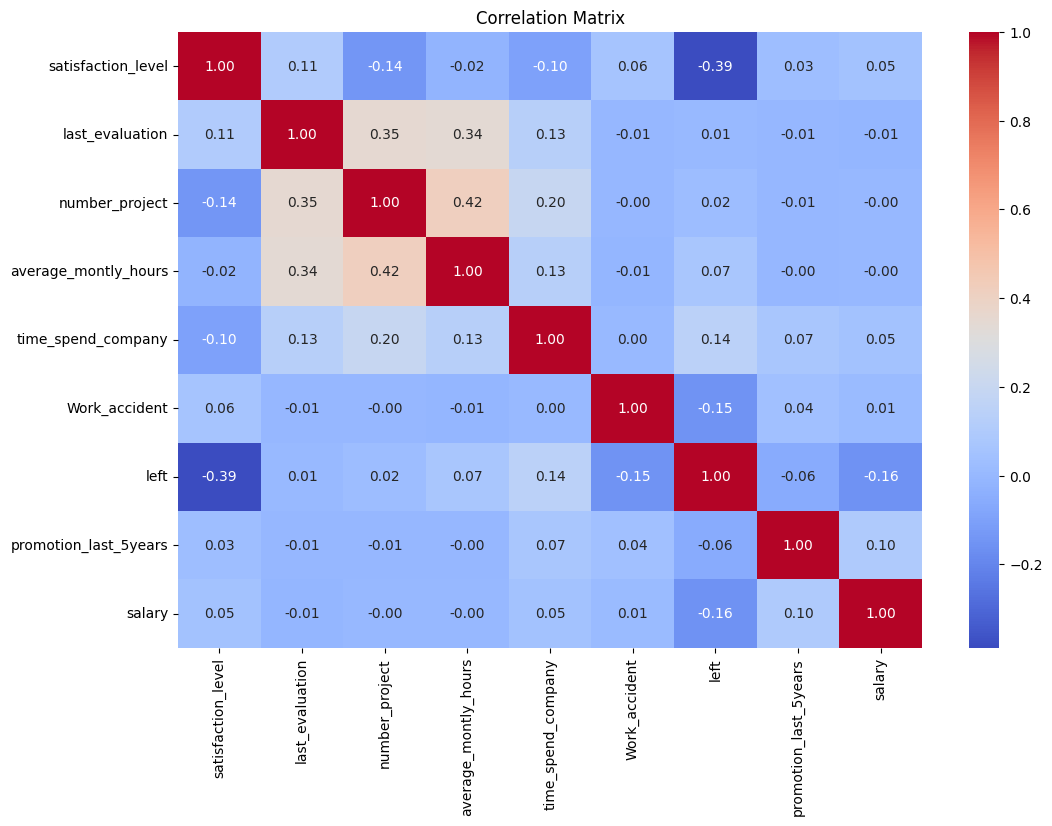

In [21]:
# Encode salary for correlation purposes
df_encoded = hr_df_ED.copy()
salary_map = {'low': 0, 'medium': 1, 'high': 2}
df_encoded['salary'] = df_encoded['salary'].map(salary_map)

# Correlation heatmap (numeric columns only)
numeric_cols = df_encoded.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
